In [2]:
import matplotlib.pyplot as plt
from scipy import integrate
import math

def get_rdf_values(pressure, pair):
    directory = 'D:/MSc/summer_project/p' + str(pressure)
    file_path = directory + '/rdf.out' + pair + '.txt'
    with open(file_path, 'r') as file:
        data = file.readlines()
        x_values = []
        y_values = []
        for line in data:
            x, y = map(float, line.split())
            x_values.append(x)
            y_values.append(y)
    return x_values, y_values
    
def plot_rdf(pair,pressure, x_values,y_values):
    label = 'P' + str(pressure)
    colour = 'red'
    plt.plot(x_values, y_values, label = label, color = colour)

    plt.legend()
    plt.xlim(-1,30)
    plt.ylim(-0.2,20)
    plt.xlabel('r [$a_0$]')
    plt.ylabel('g(r)')
    plt.grid(True)

    title_label = ''
    for character in pair[:-1]:
        if character == '1':
            title_label += 'O-'
        elif character == '2':
            title_label += 'C-'
        elif character == '3':
            title_label += 'Na-'
        else:
            print('Invalid character:', character)
            break
    title_label = title_label[:-1]
    plt.title('Radial Distribution Functions for ' + title_label)

######################

def find_max(lower_index, upper_index, x_values, y_values):
    plt.plot(x_values[lower_index],0, marker = '|', color = 'black', markersize = 100)
    plt.plot(x_values[upper_index],0, marker = '|', color = 'black', markersize = 100)
    max_index = None
    if upper_index - lower_index <= 50:
        print('x\ty')
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            print(index+lower_index, '\t', values[0], '\t', values[1])
        highest_value = max(y_values[lower_index:upper_index])
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            if values[1] == highest_value:
                print('The first maximum is at index ' + str(index+lower_index) + ' with x = ' + str(values[0]) + ' and y = ' + str(values[1])+'.')
                max_index = index + lower_index
                break
    return max_index


x	y
90 	 3.61999991908669 	 0.528513943814194
91 	 3.65999991819263 	 1.17031522525792
92 	 3.69999991729856 	 2.16569704432835
93 	 3.73999991640449 	 3.26425401617121
94 	 3.77999991551042 	 4.20711726900541
95 	 3.81999991461635 	 4.35441050765903
96 	 3.85999991372228 	 3.90583125269187
97 	 3.89999991282821 	 3.13558087000157
98 	 3.93999991193414 	 2.12465712099608
99 	 3.97999991104007 	 1.31579078725975
100 	 4.019999910146 	 0.679792601848728
101 	 4.05999990925193 	 0.30662933790987
102 	 4.09999990835786 	 0.106965111720758
103 	 4.13999990746379 	 0.0291343532498909
104 	 4.17999990656972 	 0.007084816712163738
105 	 4.21999990567565 	 0.007540225007175249
106 	 4.25999990478158 	 0.01676401723085489
107 	 4.29999990388751 	 0.03574398722678881
108 	 4.33999990299344 	 0.07296107967460545
109 	 4.37999990209937 	 0.117677522717473
The first maximum is at index 95 with x = 3.81999991461635 and y = 4.35441050765903.


95

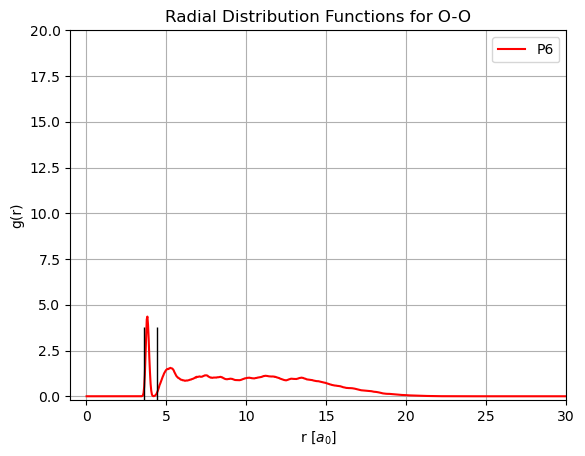

In [4]:
pressure = 6
pair = '111' #pairs = ['111','121', '131', '221', '231','331']

lower_index = 90
upper_index = 110

x_values, y_values = get_rdf_values(pressure, pair)
plot_rdf(pair,pressure,x_values,y_values)
find_max(lower_index, upper_index, x_values, y_values)

In [ ]:
p1_separations = [3.97999991104007]
p2_separations = [3.97999991104007]
p3_separations = [3.93999991193414]
p4_separations = [3.89999991282821]
p5_separations = [3.85999991372228]
p6_separations = [3.81999991461635]